# Feature Matching - Part 2

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

# Loading Images

In [3]:
reeses = cv2.imread('../DATA/reeses_puffs.png', 0)

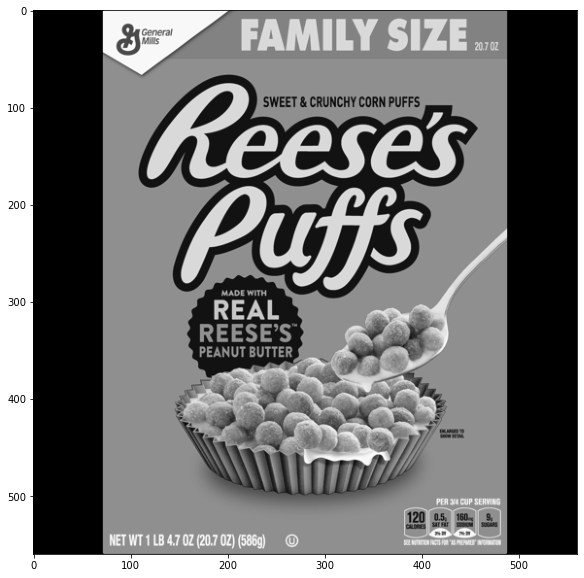

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread('../DATA/many_cereals.jpg', 0)

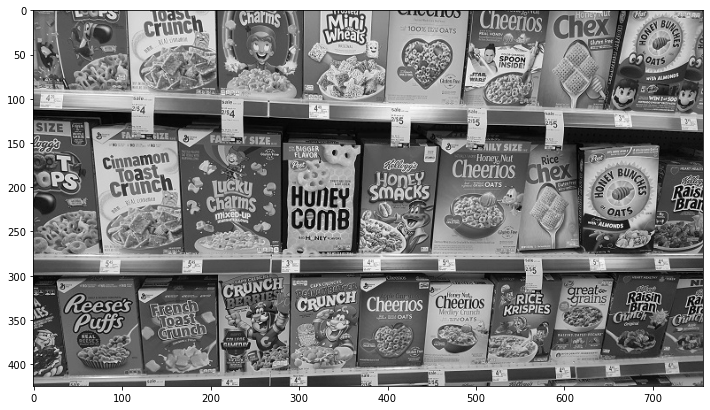

In [6]:
display(cereals)

## Brute-Force Matching with SIFT Descriptors and Ratio Test

In [7]:
sift = cv2.xfeatures2d.SIFT_create()

In [8]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [9]:
des1

array([[19.,  0.,  0., ...,  1.,  0.,  0.],
       [15.,  0.,  0., ..., 11.,  1.,  0.],
       [21.,  0.,  0., ...,  0., 10., 13.],
       ...,
       [61.,  6.,  0., ...,  0.,  0.,  0.],
       [27.,  0.,  0., ...,  0.,  0.,  0.],
       [48.,  0.,  0., ...,  0.,  1.,  0.]], dtype=float32)

In [10]:
bf = cv2.BFMatcher()

In [11]:
matches = bf.knnMatch(des1, des2, k=2)

In [12]:
# matches

### Ratio Test (less distance == better match)

In [13]:
good = []

for match1, match2 in matches:
    # If match1 distance is less than 75% of match2 distance
    # then descriptor was a good match, let's keeps it
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

In [14]:
len(good), len(matches)

(79, 1501)

In [15]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

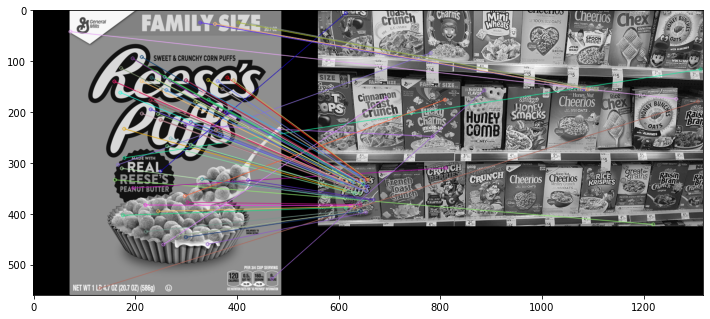

In [16]:
display(sift_matches)

## FLANN-based Macther

In [17]:
sift = cv2.xfeatures2d.SIFT_create()

In [18]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [19]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [20]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [21]:
matchees = flann.knnMatch(des1, des2, k=2)

### Ratio Test

In [22]:
good = []

for match1, match2 in matches:
    # If match1 distance is less than 70% of match2 distance
    # then descriptor was a good match, let's keeps it
    if match1.distance < 0.70 * match2.distance:
        good.append([match1])

In [23]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=0)

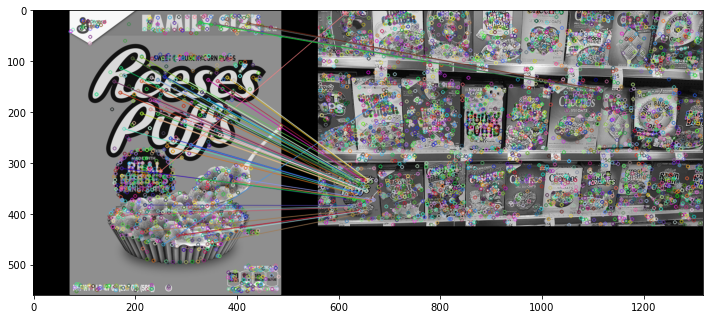

In [24]:
display(flann_matches)

### FLANN-based Macther wit Mask

In [25]:
sift = cv2.xfeatures2d.SIFT_create()

In [26]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [27]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [28]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [29]:
matchees = flann.knnMatch(des1, des2, k=2)

In [30]:
matchesMask = [[0, 0] for i in range(len(matches))]

In [31]:
# matchesMask

In [32]:
for i, (match1, match2) in enumerate(matches):
    # If match1 distance is less than 70% of match2 distance
    # then descriptor was a good match, let's keeps it
    if match1.distance < 0.70 * match2.distance:
        matchesMask[i] = [1, 0]

In [33]:
draw_params = dict(
    matchColor=(0, 255, 0),
    singlePointColor=(255, 0, 0),
    matchesMask=matchesMask,
    flags=0
)

In [34]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

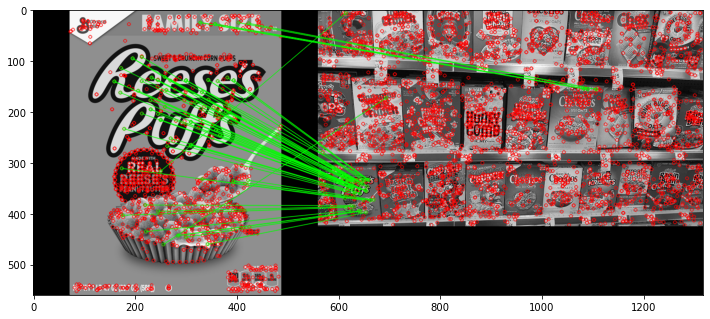

In [35]:
display(flann_matches)